# About Dataset
This is Spotify Million Song Dataset. This dataset contains song names, artists names, link to the song and lyrics.

# Idea
I thought to find for a given song lyrics the corresponding lyrics of another song.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
import io
from google.colab import files
import csv

uploaded = files.upload()
pd.read_csv(io.StringIO(uploaded['spotify_songs.csv'].decode('utf-8')))

Saving spotify_songs.csv to spotify_songs.csv


,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...


In [3]:
songs = pd.read_csv('spotify_songs.csv')
songs.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [4]:
songs.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


First extracting word count vectors using CountVectorizer function.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = songs["text"]

vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None, max_features=10000)
                            
WCmatrix = vectorizer.fit_transform(corpus)# Your code goes here

Finding nearest neighbors of "As Good As New" song.

In [6]:
from sklearn.metrics import pairwise_distances

# Your code goes here
song1 = WCmatrix[songs[songs["song"] == "As Good As New"].index]
dist = pairwise_distances(song1, WCmatrix)
songs["BO-eucl"] = dist.T
songs.sort_values(by='BO-eucl')[:10]

,artist,song,link,text,BO-eucl
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...,0.000000
4727,Electric Light Orchestra,Auntie -,/e/electric+light+orchestra/auntie+_10095655.html,"Got love, if that's what you need \r\nI got t...",39.962482
3055,Chuck Berry,Ma' Dear Ma' Dear,/c/chuck+berry/ma+dear+ma+dear_20514570.html,"Ma' dear, Ma' dear, she told me one day \r\nT...",42.661458
55987,Westlife,I Lay My Love On You,/w/westlife/i+lay+my+love+on+you_20145895.html,Just a smile and the rain is gone \r\nCan har...,44.586994
389,Alabama,Forever's As Far As I'll Go,/a/alabama/forevers+as+far+as+ill+go_20005123....,I'll admit I could feel it \r\nThe first time...,44.710178
15191,Out Of Eden,Greater Love,/o/out+of+eden/greater+love_20208900.html,All of my life I've dreamed a love would come ...,44.899889
2423,Chaka Khan,Spoon,/c/chaka+khan/spoon_20028835.html,I got me some cookin' \r\nNot all that good l...,44.988888
16418,Prince,Glam Slam,/p/prince/glam+slam_20111314.html,This thing we got - it's alive! \r\nIt seems ...,45.011110
36231,Housemartins,I Can't Put My Finger On It,/h/housemartins/i+cant+put+my+finger+on+it_200...,As martin said to xanthe \r\nAs they played w...,45.144213
29564,Depeche Mode,Shake The Disease,/d/depeche+mode/shake+the+disease_20039276.html,"I'm not going down on my knees, \r\nBegging y...",45.188494


Measuring the pairwise distance between top 3 songs from above table.

In [7]:
song1_song2 = WCmatrix[songs[(songs["song"] == "As Good As New") | (songs["song"] == "Auntie -")].index]
dist_song1_song2 = pairwise_distances(song1_song2)

song1_song3 = WCmatrix[songs[(songs["song"] == "As Good As New") | (songs["song"] == "Ma' Dear Ma' Dear")].index]
dist_song1_song3 = pairwise_distances(song1_song3)

song2_song3 = WCmatrix[songs[(songs["song"] == "Ma' Dear Ma' Dear") | (songs["song"] == "Auntie -")].index]
dist_song2_song = pairwise_distances(song2_song3)

print("Distance between As Good As News and Auntie -: " + str(dist_song1_song2[0, 1]))
print("Distance between As Good As New and Ma' Dear Ma' Dear: " + str(dist_song1_song3[0, 1]))
print("Distance betwene Ma' Dear Ma' Dear and Auntie -: " + str(dist_song2_song[0, 1]))

Distance betwen As Good As News and Auntie -: 39.96248240537617
Distance betwen As Good As New and Ma' Dear Ma' Dear: 42.661458015403085
Distance betwen Ma' Dear Ma' Dear and Auntie -: 36.40054944640259


In [8]:
def top_words(name):
    """
    Get a table of the most frequent words in the given person's wikipedia page.
    """
    # Your code goes here
    df = pd.DataFrame(songs[songs["song"] == name]["text"].values[0].split(), columns=["word"])
    df = df["word"].value_counts().to_frame("count")
    
    return df.sort_values(by='count',ascending=False)

In [9]:
as_good_as_new_words = top_words('As Good As New')
as_good_as_new_words.head(10)

,count
ma,30
I,14
as,12
my,10
you,9
good,9
to,9
love,7
that,6
As,6


In [10]:
auntie_words = top_words('Auntie -')
auntie_words.head(10)

,count
you,17
I,15
ma-ma-ma,8
get,8
You,6
"belle,",6
gotta,6
before,4
my,4
or,4


In [11]:
common_words = as_good_as_new_words.join(auntie_words, rsuffix="_Auntie -")
common_words.sort_values(by='count_Auntie -', ascending=False).head(10)

,count,count_Auntie -
you,9,17.0
I,14,15.0
get,1,8.0
my,10,4.0
the,1,3.0
know,2,3.0
on,2,2.0
so,2,2.0
that,6,2.0
love,7,2.0


In conclusion, the connections are not very good, the most frequently used words are too general, for example "you" or "I".

Let's try to do the above operations on the example of a song with a more specific theme, for example about love. After all, there are a lot of such songs.

In [13]:
from sklearn.metrics import pairwise_distances

song2 = WCmatrix[songs[songs["song"] == "We Found Love"].index]
dist = pairwise_distances(song2, WCmatrix)
songs["BO-eucl"] = dist.T
songs.sort_values(by='BO-eucl')[:10]

,artist,song,link,text,BO-eucl
3322,Coldplay,We Found Love,/c/coldplay/we+found+love_20987570.html,Yellow diamonds in the light \r\nAnd we're st...,0.000000
9780,Joni Mitchell,Tin Angel,/j/joni+mitchell/tin+angel_20075298.html,Varnished weeds in window jars \r\nTarnished ...,22.158520
17704,Rihanna,We Found Love,/r/rihanna/we+found+love_20984115.html,Yellow diamonds in the light \r\nAnd we're st...,22.338308
29252,Deep Purple,Place In Line,/d/deep+purple/place+in+line_20038871.html,"I'm living in this line \r\nI know my place, ...",22.847319
21771,Xandria,Answer,/x/xandria/answer_20533458.html,We fought the truth \r\nAs long as we lived o...,22.891046
38820,Journey,Stone In Love,/j/journey/stone+in+love_20075728.html,"Those crazy nights, I do remember in my youth ...",22.934690
40110,Kenny Rogers,People In Love,/k/kenny+rogers/people+in+love_20496499.html,People in love \r\nThey've got it all \r\nTh...,23.086793
50765,Richard Marx,Breathless,/r/richard+marx/breathless_20116003.html,Never knew love before \r\nNever dreamed ther...,23.173260
40028,Kenny Rogers,Crazy In Love,/k/kenny+rogers/crazy+in+love_20177908.html,Ain't funny how time \r\nSteals the feeling f...,23.194827
20855,Vince Gill,What They All Call Love,/v/vince+gill/what+they+all+call+love_20144454...,"It ain't about you, it ain't about me \r\nIt'...",23.345235


In [14]:
song1_song2 = WCmatrix[songs[(songs["song"] == "We Found Love") | (songs["song"] == "Tin Angel")].index]
dist_song1_song2 = pairwise_distances(song1_song2)

song1_song3 = WCmatrix[songs[(songs["song"] == "We Found Love") | ((songs['artist'] == 'Rihanna') & (songs['song'] == 'We Found Love'))].index]
dist_song1_song3 = pairwise_distances(song1_song3)

song2_song3 = WCmatrix[songs[(songs["song"] == "Tin Angel") | ((songs['artist'] == 'Rihanna') & (songs['song'] == 'We Found Love'))].index]
dist_song2_song3 = pairwise_distances(song2_song3)

print("Distance betwen We Found Love and Rihanna's We Found Love: " + str(dist_song1_song2[0, 1]))
print("Distance betwen  We Found Love and Tin Angel: " + str(dist_song1_song3[0, 1]))
print("Distance betwen Tin Angel and Rihanna's We Found Love: " + str(dist_song2_song3[0, 1]))

Distance betwen We Found Love and Rihanna's We Found Love: 22.15851980616034
Distance betwen  We Found Love and Tin Angel: 22.338307903688676
Distance betwen Tin Angel and Rihanna's We Found Love: 40.8656334834051


In [15]:
we_found_love_words = top_words('We Found Love')
we_found_love_words.head(10)

,count
in,10
a,9
place,8
hopeless,8
love,8
found,8
We,8
the,4
I,4
it,3


In [16]:
tin_angel_words = top_words('Tin Angel')
tin_angel_words.head(10)

,count
in,6
I,5
a,5
love,4
found,4
someone,4
to,4
today,4
and,3
of,3


In [17]:
common_words = we_found_love_words.join(tin_angel_words, rsuffix="_Angel")
common_words.sort_values(by='count_Angel', ascending=False).head(5)

,count,count_Angel
in,10,6.0
a,9,5.0
I,4,5.0
love,8,4.0
found,8,4.0


As we can see, the results are so much better and distances are closer. 
The most repeated words in both songs include the word "found", which is often combined with the word love.

In [18]:
word_to_ind={v: i for i, v in enumerate(vectorizer.get_feature_names())} # a dictionary with words as keys and indices as values

# Your code goes here

song1_song2 = we_found_love_words.join(tin_angel_words, rsuffix="_Angel")
song1_song2.dropna(inplace=True)
song1_song2 = song1_song2.sort_values(by="count", ascending=False).iloc[:6]
articles = WCmatrix[:, [word_to_ind[word] for word in song1_song2.index]]
articles = [i for i, article in enumerate(articles) if article.todense().all()]
len(articles)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


196

In [19]:
songs['song'][articles]

270                      Evil Woman
566               That Kind Of Love
1022          Written In Your Heart
1948     You Can't Measure The Cost
2883                         Change
                    ...            
56803               Next Generation
56920                       Pumpin'
57064              Scent Of A Woman
57140                     Back Home
57569            Last But Not Least
Name: song, Length: 196, dtype: object

196 songs contains 6 most frequent words from "We Found Love" song.

## TF-IDF to the rescue

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b")
corpus = songs["text"]
                            
WCmatrix = vectorizer.fit_transform(corpus)

tfidf = TfidfTransformer(smooth_idf=False, norm=None)
TFIDFmatrix = tfidf.fit_transform(WCmatrix)

In [21]:
love_matrix = TFIDFmatrix[songs[(songs['artist'] == 'Coldplay') & (songs['song'] == 'We Found Love')].index]
dist = pairwise_distances(love_matrix, TFIDFmatrix)
                        
# add the distances as a column in the wiki dataframe
songs['BO-eucl-TF-IDF'] = dist.T

songs.sort_values(by='BO-eucl-TF-IDF').iloc[0:10]

,artist,song,link,text,BO-eucl,BO-eucl-TF-IDF
3322,Coldplay,We Found Love,/c/coldplay/we+found+love_20987570.html,Yellow diamonds in the light \r\nAnd we're st...,0.000000,0.000000
24107,Andy Williams,Hopeless,/a/andy+williams/hopeless_20778892.html,"This is hopeless \r\nYes, it's so hopeless \...",28.106939,70.139939
17704,Rihanna,We Found Love,/r/rihanna/we+found+love_20984115.html,Yellow diamonds in the light \r\nAnd we're st...,22.338308,73.915650
31006,Ella Fitzgerald,Dreamer,/e/ella+fitzgerald/dreamer_20188593.html,Why are my eyes always full of this vision of ...,26.776856,79.742335
21654,Wishbone Ash,The Day I Found Your Love,/w/wishbone+ash/the+day+i+found+your+love_2014...,When I was a stranger to you in the night \r\...,24.637370,80.528746
21658,Wishbone Ash,Trust In You,/w/wishbone+ash/trust+in+you_20147224.html,Have you ever made a sign \r\nCould you be a ...,25.475478,80.793737
51638,Sia,Where I Belong,/s/sia/where+i+belong_20472785.html,Without truth \r\nWe lose \r\nYet we want to...,24.020824,80.885865
20855,Vince Gill,What They All Call Love,/v/vince+gill/what+they+all+call+love_20144454...,"It ain't about you, it ain't about me \r\nIt'...",23.345235,80.900266
22114,Yo La Tengo,Double Dare,/y/yo+la+tengo/double+dare_20531749.html,"I, I should know \r\nYou shouldn't have to te...",24.207437,80.996809
39597,Keith Urban,Only You Can Love Me This Way,/k/keith+urban/only+you+can+love+me+this+way_2...,Well I know there's a reason \r\nAnd I know t...,24.939928,81.068483


In [24]:
page = TFIDFmatrix[songs[(songs["song"] == "We Found Love") | (songs["song"] == "Hopeless")].index]
distance = pairwise_distances(page)
distance[0, 1]

73.91564962584074

Conclusion: The distance is slightly larger.

In [25]:
songs.sort_values(by='BO-eucl-TF-IDF',ascending=True)[['song','BO-eucl-TF-IDF']][0:10]

,song,BO-eucl-TF-IDF
3322,We Found Love,0.000000
24107,Hopeless,70.139939
17704,We Found Love,73.915650
31006,Dreamer,79.742335
21654,The Day I Found Your Love,80.528746
21658,Trust In You,80.793737
51638,Where I Belong,80.885865
20855,What They All Call Love,80.900266
22114,Double Dare,80.996809
39597,Only You Can Love Me This Way,81.068483


In [27]:
def compute_length(row):
    return len(row['text'].split(' '))

songs['length'] = songs.apply(compute_length, axis=1)

 The document lengths for the 100 nearest neighbors to "We found love" song.

In [28]:
nearest_neighbors_euclidean = songs.sort_values(by='BO-eucl-TF-IDF',ascending=True)[['song','length', 'BO-eucl-TF-IDF']][:100]
nearest_neighbors_euclidean

,song,length,BO-eucl-TF-IDF
3322,We Found Love,163,0.000000
24107,Hopeless,195,70.139939
17704,We Found Love,252,73.915650
31006,Dreamer,102,79.742335
21654,The Day I Found Your Love,107,80.528746
...,...,...,...
30439,When I Fall In Love,120,83.080436
2799,As Long As I Have Your Love,114,83.092406
18140,Give You Up,129,83.095738
8302,Why Don't You Believe,107,83.099154


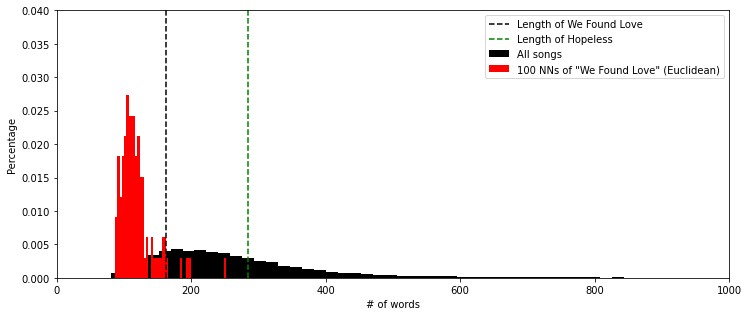

In [30]:
plt.figure(figsize=(10.5,4.5))
plt.hist(songs['length'], 50, density=True, color='black', label='All songs'
        )
plt.hist(nearest_neighbors_euclidean['length'], 50, density=True, color='red', label='100 NNs of "We Found Love" (Euclidean)'
        )
plt.axvline(songs[songs['song'] == "We Found Love"]['length'].values[0], label='Length of We Found Love', linestyle='--', color='black'# Your code goes here
        )
plt.axvline(songs[songs['song'] == "Hopeless"]['length'].values[0], label='Length of Hopeless', linestyle='--', color='green'# Your code goes here
        )

plt.axis([0, 1000, 0, 0.04])
plt.xlabel("# of words")
plt.ylabel("Percentage")
plt.legend()
plt.tight_layout()

As we can see, most of nearest neighbors of We Found Love song are being shorter than 200 words.

Training a new nearest neighbor model with cosine distances.

In [31]:
love = TFIDFmatrix[songs[(songs['artist'] == 'Coldplay') & (songs['song'] == 'We Found Love')].index]
dist = pairwise_distances(love, TFIDFmatrix, metric="cosine")
songs["BO-cos-TF-IDF"] = dist.T
nearest_neighbors_cosine = songs.sort_values(by='BO-cos-TF-IDF').iloc[:100]
nearest_neighbors_cosine

,artist,song,link,text,BO-eucl,BO-eucl-TF-IDF,length,BO-cos-TF-IDF
3322,Coldplay,We Found Love,/c/coldplay/we+found+love_20987570.html,Yellow diamonds in the light \r\nAnd we're st...,0.000000,0.000000,163,0.000000
17704,Rihanna,We Found Love,/r/rihanna/we+found+love_20984115.html,Yellow diamonds in the light \r\nAnd we're st...,22.338308,73.915650,252,0.014942
24107,Andy Williams,Hopeless,/a/andy+williams/hopeless_20778892.html,"This is hopeless \r\nYes, it's so hopeless \...",28.106939,70.139939,195,0.393787
56445,Widespread Panic,Hope In A Hopeless World,/w/widespread+panic/hope+in+a+hopeless+world_2...,Baby born in New York City \r\nWrapped in a b...,32.046841,95.758352,325,0.505439
26497,Britney Spears,Now That I Found You,/b/britney+spears/now+that+i+found+you_2107284...,On a shameless night \r\nIn a nameless place ...,60.183054,124.692540,381,0.611673
...,...,...,...,...,...,...,...,...
42353,Luther Vandross,Love Me Again,/l/luther+vandross/love+me+again_20489459.html,What are we saying? \r\nFor what are we prayi...,35.707142,97.493502,321,0.776266
27100,Chaka Khan,I Finally Found You,/c/chaka+khan/i+finally+found+you_20028916.html,I finally found you \r\nWalkin' down the road...,25.019992,91.586797,115,0.776322
22147,Yoko Ono,I Love All Of Me,/y/yoko+ono/i+love+all+of+me_20148615.html,"I'm a shy girl, my mother calls me flatchest, ...",64.342832,133.098743,420,0.776355
11026,Kyla,Let The Love Begin,/k/kyla/let+the+love+begin_20659453.html,"Look at us, ain't it funny \r\nIs it just beg...",29.206164,93.480391,242,0.776378


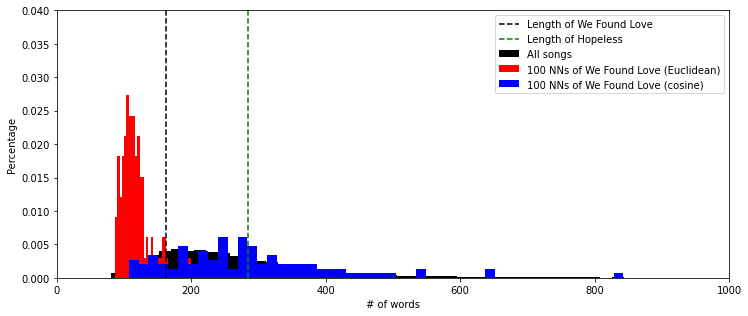

In [32]:
plt.figure(figsize=(10.5,4.5))
plt.hist(songs['length'], 50, density=True, color='black', label='All songs'
        )
plt.hist(nearest_neighbors_euclidean['length'], 50, density=True, color='red', label='100 NNs of We Found Love (Euclidean)'
        )
plt.hist(nearest_neighbors_cosine['length'], 50, density=True, color='blue', label='100 NNs of We Found Love (cosine)'
        )
plt.axvline(songs[songs['song'] == "We Found Love"]['length'].values[0], label='Length of We Found Love', linestyle='--', color='black'# Your code goes here
        )
plt.axvline(songs[songs['song'] == "Hopeless"]['length'].values[0], label='Length of Hopeless', linestyle='--', color='green'# Your code goes here
        )

# Your code goes here
plt.axis([0, 1000, 0, 0.04])
plt.xlabel("# of words")
plt.ylabel("Percentage")
plt.legend()
plt.tight_layout()

The 100 nearest neighbors using cosine distance provide a sampling across the range of document lengths, rather than just short articles like Euclidean distance provided.

As we can see, the 100 nearest neighbors using cosine distance provide a sampling across the range of document lengths.